<a href="https://colab.research.google.com/github/hacksJuanDavid/SalaryClassification/blob/main/SalaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Used Libraries


In [ ]:
import pandas as pd # Library for view data in tables 2d and 3d
import numpy as np # Library for manipulation large data and mathematics
import matplotlib.pyplot as plt # Library for view data in charts
from sklearn.preprocessing import LabelEncoder # Library for label data
from sklearn.metrics import roc_curve, roc_auc_score # Library for view data in charts
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Library for view data in charts
from sklearn.datasets import make_classification # Library for create dataset
from sklearn.ensemble import GradientBoostingClassifier # Library for create model
from sklearn.model_selection import train_test_split # Library for train model test
from sklearn.metrics import accuracy_score, classification_report # Library for evaluate model
from sklearn.preprocessing import LabelBinarizer # Library for label data
from sklearn.metrics import roc_curve, auc # Library for view data in charts

## Chargue data from dataset

In [7]:
# Chargue data from file
data = pd.read_csv('data/HR_comma_sep.csv')

# Print data head for view names the columns
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Count type classification in base salary

In [8]:
# Count concurrence for column
classification_counts = data['salary'].value_counts()

# Print concurrence
print(classification_counts)

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


## Create a diagram of bars for counting salary

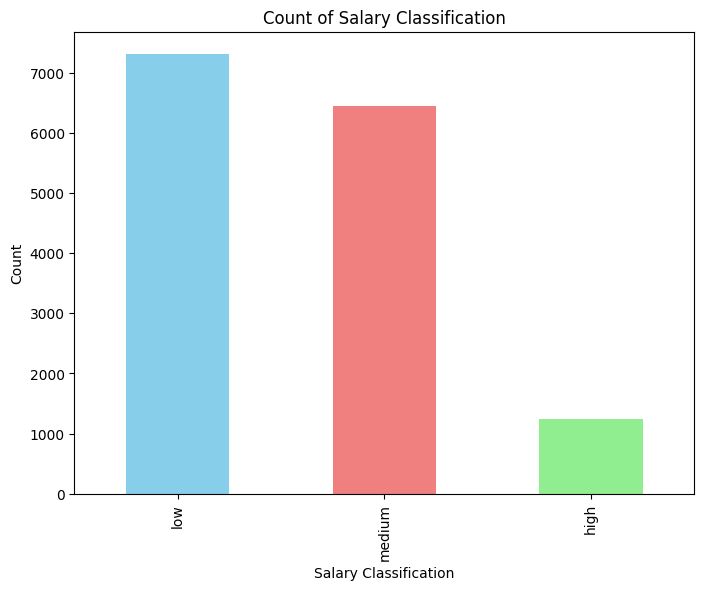

In [9]:
# Create a diagram of bars for vars of count salary
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Count of Salary Classification')
plt.xlabel('Salary Classification')
plt.ylabel('Count')
plt.show()

## Information for values in columns with you type data in dataframes

In [10]:
# View info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Infor name in columns

In [11]:
# Infor columns
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

## Show turnover in columns

In [12]:
turnover_rate_left = data['left'].value_counts() / len(data)
turnover_rate_work_accident = data['Work_accident'].value_counts() / len(data)
turnover_rate_promotion_last_5years = data['promotion_last_5years'].value_counts() / len(data)

print(turnover_rate_left)
print(turnover_rate_work_accident)
print(turnover_rate_promotion_last_5years)

left
0    0.761917
1    0.238083
Name: count, dtype: float64
Work_accident
0    0.85539
1    0.14461
Name: count, dtype: float64
promotion_last_5years
0    0.978732
1    0.021268
Name: count, dtype: float64


## Describe data

In [13]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Create histogram

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>,
        <Axes: title={'center': 'number_project'}>],
       [<Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>, <Axes: >]],
      dtype=object)

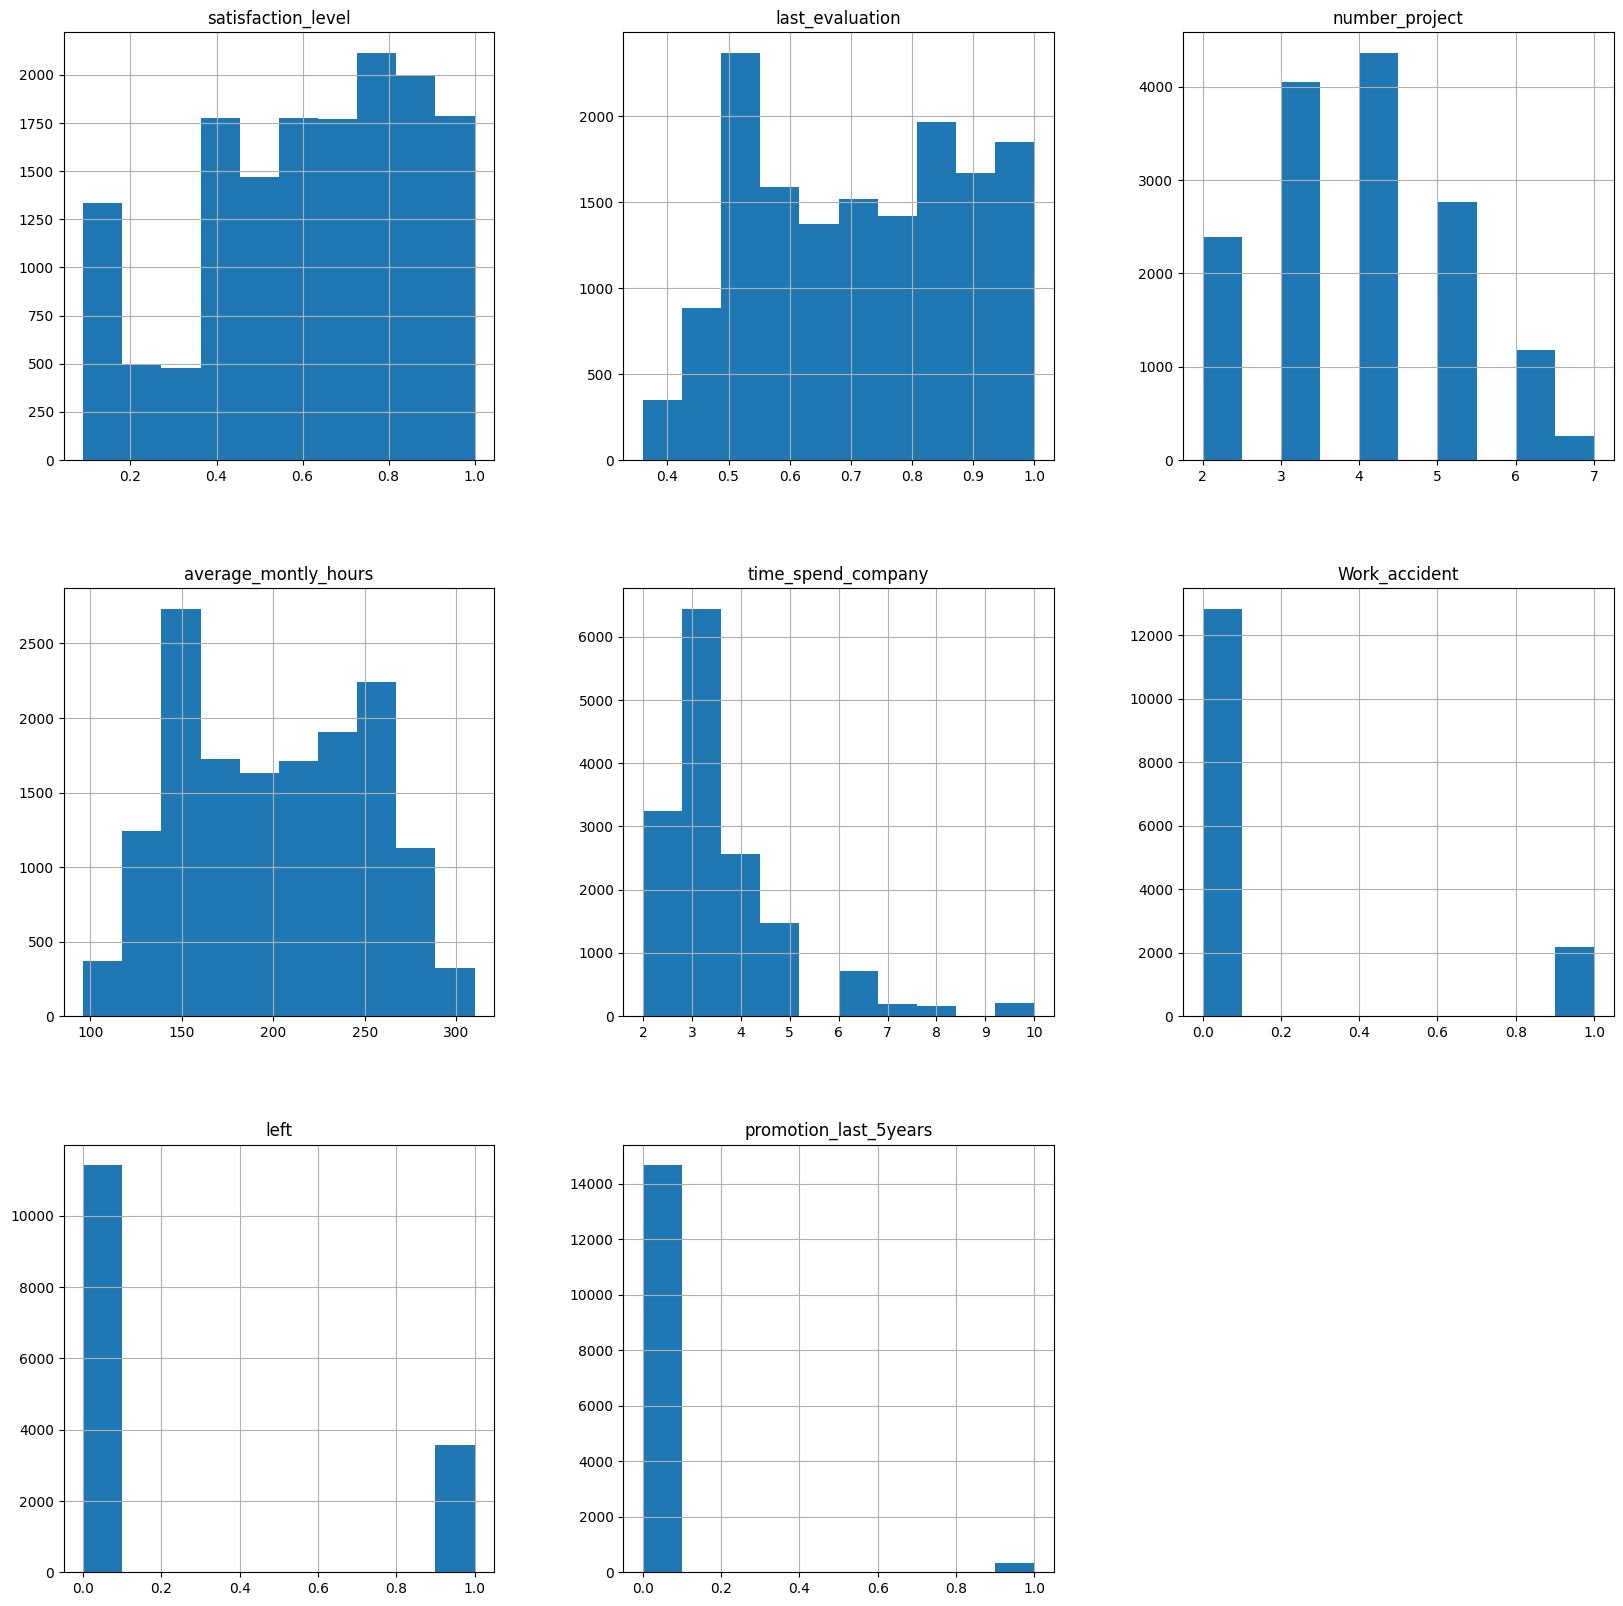

In [14]:
# Create history diagrams
data.hist(figsize=(20,20))

## Select vars for dataframe

In [15]:
# Select vars
# Features
features = ['satisfaction_level',
            'last_evaluation',
            'number_project',
            'average_montly_hours',
            'time_spend_company',
            'Work_accident',
            'left',
            'promotion_last_5years'
            ]

# Set in dataframe features
X = data[features]

# Set in dataframe target
Y = data['salary']

## Label for class in model



In [16]:
from sklearn.preprocessing import LabelEncoder
# Codificar la variable objetivo (salary) si es categórica
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(data['salary'])


## Train model

In [27]:
# Create the dataset
X, Y = make_classification(n_samples=15000, n_features=8, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1, max_depth=10, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

## Analyze model

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8757777777777778
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1452
           1       0.94      0.88      0.91      1551
           2       0.86      0.91      0.89      1497

    accuracy                           0.88      4500
   macro avg       0.88      0.88      0.88      4500
weighted avg       0.88      0.88      0.88      4500



## Matrix Confusion

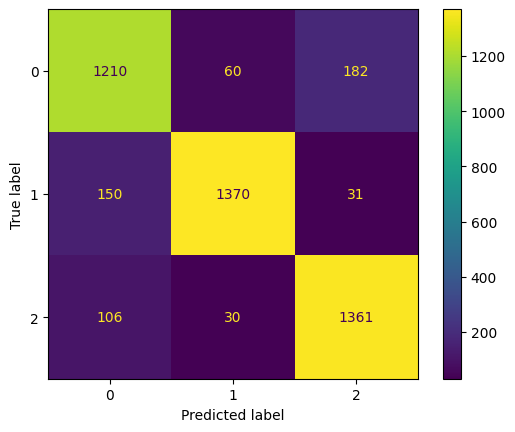

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## Curve Roc

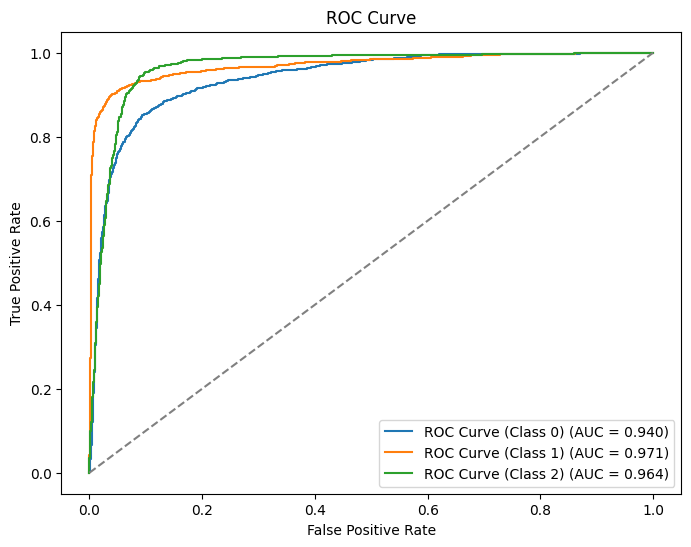

In [24]:
# Convert the labels to binary format
lb = LabelBinarizer()
Y_test_bin = lb.fit_transform(y_test)

# Get prediction probabilities for each class
y_probs = gb_classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(gb_classifier.n_classes_): # loop through each of the classes
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(gb_classifier.n_classes_):
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve (Class {i}) (AUC = {roc_auc[i]:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reference line (AUC = 0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()